In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
%pylab inline

from scipy.integrate import simps

Populating the interactive namespace from numpy and matplotlib


### data from timofey

In [2]:
data = pd.read_excel('data from Timofey/S-beta_bb_Ge-76_Red.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 8 columns):
False Energy      1000 non-null float64
S                 1000 non-null float64
False Energy.1    539 non-null float64
Unnamed: 3        461 non-null float64
True Energy       1000 non-null float64
Square            1715 non-null float64
0                 1715 non-null float64
Unnamed: 7        4 non-null object
dtypes: float64(7), object(1)
memory usage: 107.3+ KB


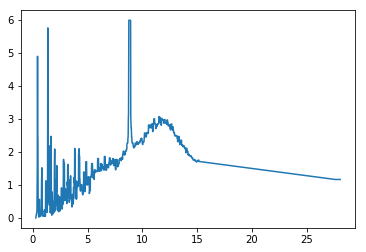

In [4]:
plt.plot(data['True Energy'], data['S'])

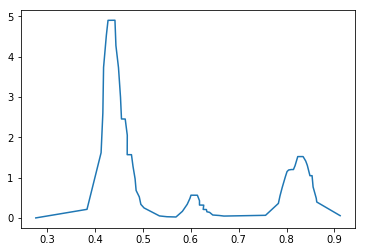

In [7]:
data_less = data[ data['True Energy'] <= 1 ]
plt.plot(data_less['True Energy'], data_less['S'])

не очень хорошо т.к. в оригинальном спектре между 0 и 1 есть 9 пиков

### my data

my_data - вручную оцифрованные данные пиков

In [110]:
my_data = pd.read_csv('spectre_modified_2.csv')
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 2 columns):
x         256 non-null float64
Curve1    256 non-null float64
dtypes: float64(2)
memory usage: 4.1 KB


считаем значения из таблицы bgt

In [111]:
bgt = pd.read_csv('clear_B(GT).csv', sep=',')
bgt.info()

bgt_less = bgt[ bgt['Ex'] < 2000 ]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 5 columns):
Unnamed: 0        73 non-null int64
Ex                73 non-null float64
Jpi               73 non-null object
diff cross-sec    73 non-null float64
B(GT)             73 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.9+ KB


In [112]:
bgt_less['Ex'] = bgt_less['Ex']/1000

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


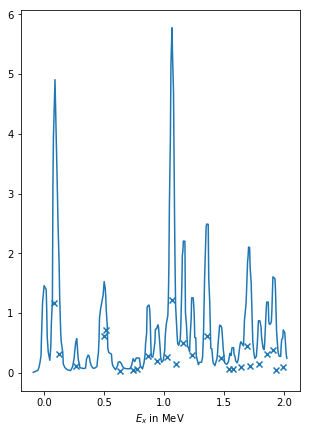

In [115]:
plt.figure(figsize=(5,7))
plt.plot(my_data['x'], my_data['Curve1'])
plt.scatter(bgt_less['Ex'], bgt_less['diff cross-sec'], marker='x')
plt.xlabel('$E_x$ in MeV')

из bgt_less уберем значения с Jpi != 1

In [117]:
bgt_less = bgt_less[ bgt_less['Jpi'] == '1' ]
bgt_less

,Unnamed: 0,Ex,Jpi,diff cross-sec,B(GT)
0,1,0.0860,1,1.173,1.20
1,2,0.1200,1,0.318,0.33
2,3,0.2650,1,0.113,0.10
4,31,0.5138,1,0.725,0.71
8,9,0.8640,1,0.284,0.25
9,10,0.9360,1,0.209,0.18
11,12,1.0630,1,1.230,1.36
12,13,1.0980,1,0.157,0.15
13,14,1.1570,1,0.495,0.56
14,15,1.2350,1,0.298,0.28


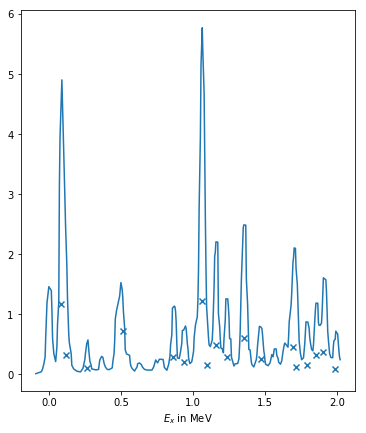

In [119]:
plt.figure(figsize=(6,7))
plt.plot(my_data['x'], my_data['Curve1'])
plt.scatter(bgt_less['Ex'], bgt_less['diff cross-sec'], marker='x')
plt.xlabel('$E_x$ in MeV')

### Гипотеза №1
d_sigma/d_omega пропорциональна площади под пиком

функция для вычисления площади пика

In [120]:
def peak_area(df, a, b):
    data = df[ df['x'].between(a, b) ] #selecting data in given (a,b) interval
    return simps(data['Curve1'].values, data['x'].values) #integrate

выберем несколько пиков и посчитаем площадь под ними

In [121]:
selected_peaks = [ 265, 864, 936, 1157, 1235, 1353, 1475, 1792, 1852, 1987 ] 

In [122]:
a_265 = peak_area(my_data, 0.22, 0.32)
a_864 = peak_area(my_data, 0.82, 0.895)
a_936 = peak_area(my_data, 0.9, 0.98)
a_1157 = peak_area(my_data, 1.12, 1.2)
a_1235 = peak_area(my_data, 1.21, 1.27)
a_1353 = peak_area(my_data, 1.3, 1.41)
a_1475 = peak_area(my_data, 1.42, 1.5)
a_1792 = peak_area(my_data, 1.76, 1.83)
a_1852 = peak_area(my_data, 1.832, 1.88)
a_1987 = peak_area(my_data, 1.97, 2.02)

selected_areas = [ a_265, a_864, a_936, a_1157, a_1235, a_1353, a_1475, a_1792, a_1852, a_1987 ]

получим значения d_sigma/d_omega для отобранных пиков 

In [123]:
cross_sec = bgt[ bgt['Ex'].isin(selected_peaks) ]['diff cross-sec'].values

отрисуем отношение площади под пиком на d_sigma/d_omega

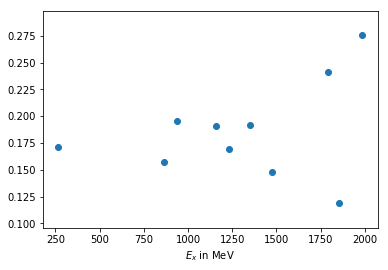

In [124]:
a = np.array(selected_areas) / cross_sec
plt.scatter(selected_peaks, a)
plt.xlabel('$E_x$ in MeV')

посчитаем коэф. для мнк прямой

In [125]:
line_fit_coef = np.polyfit(selected_peaks, a, deg = 1)
print(line_fit_coef[0], line_fit_coef[1])

2.82807223402e-05 0.149378696472


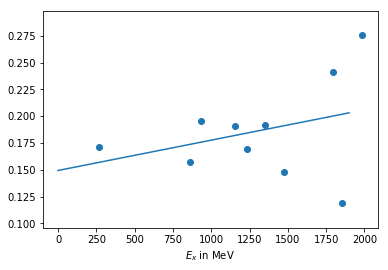

In [127]:
x = np.arange(0, 2000, 100)
y = line_fit_coef[0]*x + line_fit_coef[1]

plt.scatter(selected_peaks, a)
plt.plot(x, y)        
plt.xlabel('$E_x$ in MeV')

без последних трех точек

In [129]:
line_fit_coef = np.polyfit(selected_peaks[:-3], a[:-3], deg = 1)
print(line_fit_coef[0], line_fit_coef[1])

-1.76184681551e-06 0.176684536754


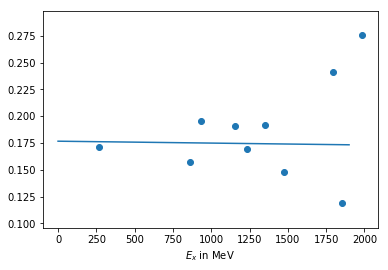

In [130]:
x = np.arange(0, 2000, 100)
y = line_fit_coef[0]*x + line_fit_coef[1]

plt.scatter(selected_peaks, a)
plt.plot(x, y) 
plt.xlabel('$E_x$ in MeV')

### Гипотеза №2
d_sigma/d_omega пропорциональна высоте пика

функция для вычисления высоты пика

In [97]:
def peak_height(df, a, b):
    data = df[ df['x'].between(a, b) ] #selecting data in given (a,b) interval
    return np.max(data['Curve1'].values) 

выберем несколько пиков и посчитаем их высоту

In [98]:
b_265 = peak_height(my_data, 0.22, 0.32)
b_864 = peak_height(my_data, 0.82, 0.895)
b_936 = peak_height(my_data, 0.9, 0.98)
b_1157 = peak_height(my_data, 1.12, 1.2)
b_1235 = peak_height(my_data, 1.21, 1.27)
b_1353 = peak_height(my_data, 1.3, 1.41)
b_1475 = peak_height(my_data, 1.42, 1.5)
b_1792 = peak_height(my_data, 1.76, 1.83)
b_1852 = peak_height(my_data, 1.832, 1.88)
b_1987 = peak_height(my_data, 1.97, 2.02)

selected_heights = [ b_265, b_864, b_936, b_1157, b_1235, b_1353, b_1475, b_1792, b_1852, b_1987 ]

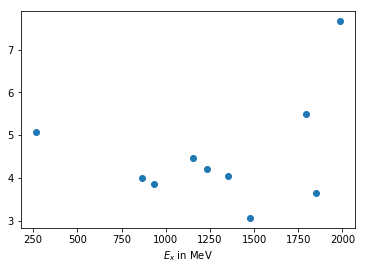

In [131]:
b = np.array(selected_heights) / cross_sec
plt.scatter(selected_peaks, b)
plt.xlabel('$E_x$ in MeV')

In [103]:
for elem in zip(selected_heights, selected_peaks): print(elem)

(0.57449099999999997, 265)
(1.1380399999999999, 864)
(0.80661400000000005, 936)
(2.2081599999999999, 1157)
(1.2583299999999999, 1235)
(2.4915500000000002, 1353)
(0.80052400000000001, 1475)
(0.87556800000000001, 1792)
(1.1871700000000001, 1852)
(0.72078399999999998, 1987)


In [106]:
red = pd.read_csv('1063_red.csv')
red_area = peak_area(red, 0, 5)
red_area

0.043052100142367898

In [108]:
blue = pd.read_csv('1063_blue.csv')
blue_area = peak_area(blue, 0, 5)
blue_area

0.0093348901825025966